In [1]:
import pickle
import pandas as pd
import os
# Configurar path
os.chdir('C:/iamas_datos2024/proyectos_parlamentarios/')
pd.set_option('display.max_colwidth', None)


In [2]:
# Leemos datos de salud
filtro_texto_SALUD_df = pickle.load(open("./filtro_texto_SALUD_df_LEY_1023.pkl", "rb"))
print(filtro_texto_SALUD_df.shape)
display(filtro_texto_SALUD_df.head(5))

(4011, 10)


,proyecto_id,titulo,titulo normalizado,cant_token,cant_token_normalizado,proyecto_girado_a_comisiones_SALUD,resultado,año,topico_dominante,entidades
0,HCDN272330,DEFENSA DEL CONSUMIDOR LEY 24240. MODIFICACION DEL ARTICULO 2 SOBRE PROVEEDORES.,defensa consumidor proveedor,11,3,COMISIONES DE SALUD,NaN,2023,31,"[(CONSUMIDOR, MISC), (MODIFICACION, MISC), (ARTICULO, MISC), (PROVEEDORES, ORG)]"
1,HCDN272329,"CAMPAÑA NACIONAL PARA LA DIFUSION, CONCIENTIZACION Y PROMOCION DE DONACION VOLUNTARIA DE SANGRE, HEMOCOMPONENTES Y MEDULA OSEA. CREACION.",campán nacional donacion voluntario sangre hemocomponent medula osea,18,8,COMISIONES DE SALUD,NaN,2023,0,"[(CAMPAÑA NACIONAL, ORG), (DIFUSION, LOC), (CONCIENTIZACION, LOC), (PROMOCION, ORG), (DONACION, ORG), (VOLUNTARIA DE SANGRE, MISC), (HEMOCOMPONENTES, ORG), (MEDULA OSEA, MISC), (CREACION, MISC)]"
2,HCDN272311,"MARCO REGULATORIO PARA EL CULTIVO, PRODUCCION, DISTRIBUCION, COMERCIALIZACION Y ADQUISICION A CUALQUIER TITULO DEL CANNABIS Y SUS DERIVADOS EN TODO EL TERRITORIO NACIONAL. REGIMEN. MODIFICACION DEL CODIGO PENAL.",marco regulatorio cultivo adquisicion titulo cannabis derivado territorio nacional regimar penal,28,11,COMISIONES DE SALUD,NaN,2023,11,"[(MARCO, MISC), (REGULATORIO, ORG), (CULTIVO, MISC), (PRODUCCION, MISC), (DISTRIBUCION, ORG), (COMERCIALIZACION, ORG), (ADQUISICION, MISC), (CUALQUIER, ORG), (CANNABIS, MISC), (DERIVADOS, MISC), (TODO, MISC), (TERRITORIO, MISC), (REGIMEN, ORG), (MODIFICACION, MISC), (CODIGO, ORG)]"
3,HCDN272307,CAMPAÑA NACIONAL DE PREVENCION DE INCIDENTES CON MONOXIDO DE CARBONO. CREACION.,campán nacional incidente monoxido carbono,11,5,COMISIONES DE SALUD,NaN,2023,5,"[(CAMPAÑA NACIONAL, ORG), (PREVENCION, ORG), (INCIDENTES, ORG), (MONOXIDO, ORG), (CARBONO, ORG), (CREACION, MISC)]"
4,HCDN272212,REGIMEN DE COMPATIBILIDAD DE BENEFICIOS SOCIALES PARA TRABAJADORES RURALES Y TEMPORARIOS.,regimar compatibilidad beneficio social trabajador rural temporario,11,7,COMISIONES DE SALUD,NaN,2023,11,"[(REGIMEN, ORG), (COMPATIBILIDAD, ORG), (BENEFICIOS SOCIALES, ORG), (RURALES, ORG), (TEMPORARIOS, ORG)]"


### Leemos datos de muerte subita

In [3]:
ms_df = pickle.load(open("./proyectos_72_integrado_20240708.pkl", "rb"))
print(ms_df.shape)
display(ms_df[['tipo de proyecto', 'denominacion','metadata.fecha','proyecto_id']].head())

(72, 30)


,tipo de proyecto,denominacion,metadata.fecha,proyecto_id
813,proyecto de ley,programa de difusion e informacion a padres y miembros de la comunidad escolar destinado a prevenir la muerte subita. regimen. capacitacion en reanimacion cardiopulmonar.,02/03/2022,hcdn255602
3251,proyecto de ley,"instituyendo el mes de octubre de cada año como ""mes nacional de concientizacion sobre el sindrome de muerte subita del lactante, los factores de riesgo y sus medidas preventivas""",12/08/2015,hcdn179252
5960,proyecto de ley,programa de difusion e informacion a padres y miembros de la comunidad escolar destinado a prevenir la muerte subita. regimen. capacitacion en reanimacion cardiopulmonar.,04/03/2020,hcdn238109
8521,proyecto de ley,instalacion de desfibriladores externos automaticos en espacios publicos y privados (reproduccion del expediente 3708-d-10).,06/03/2012,hcdn133924
8731,proyecto de ley,"incorporacion dentro de las prestaciones previstas en la ley 25929, del ejercicio profesional de la puericultura.",06/03/2020,hcdn238304


#### Muerte súbita

In [4]:
ms_df['proyecto_id'] = ms_df['proyecto_id'].str.upper()
ms_SALUD_df = pd.merge(ms_df[['tipo de proyecto', 'denominacion','metadata.fecha','proyecto_id']],filtro_texto_SALUD_df, how = 'inner',right_on='proyecto_id', left_on='proyecto_id') #.columns

In [5]:
ms_SALUD_df.shape

(25, 13)

In [7]:
ms_SALUD_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tipo de proyecto,25,1,proyecto de ley,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
denominacion,25,24,programa de difusion e informacion a padres y miembros de la comunidad escolar destinado a prevenir la muerte subita. regimen. capacitacion en reanimacion cardiopulmonar.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata.fecha,25,24,11/03/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proyecto_id,25,25,HCDN255602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
titulo,25,24,PROGRAMA DE DIFUSION E INFORMACION A PADRES Y MIEMBROS DE LA COMUNIDAD ESCOLAR DESTINADO A PREVENIR LA MUERTE SUBITA. REGIMEN. CAPACITACION EN REANIMACION CARDIOPULMONAR.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
titulo normalizado,25,17,desfibrilador externo automatico espacio publico privado,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cant_token,25.0,NaN,NaN,NaN,20.56,8.362017,10.0,14.0,20.0,26.0,43.0
cant_token_normalizado,25.0,NaN,NaN,NaN,8.6,3.708099,3.0,6.0,8.0,10.0,19.0
proyecto_girado_a_comisiones_SALUD,25,1,COMISIONES DE SALUD,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resultado,25,2,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ms_SALUD_df['topico_dominante'].value_counts().reset_index()

,topico_dominante,count
0,23,7
1,27,5
2,33,4
3,9,3
4,11,1
5,15,1
6,24,1
7,7,1
8,21,1
9,25,1


In [25]:
ms_SALUD_df[ms_SALUD_df['topico_dominante'] == 23]

,tipo de proyecto,denominacion,metadata.fecha,proyecto_id,titulo,titulo normalizado,cant_token,cant_token_normalizado,proyecto_girado_a_comisiones_SALUD,resultado,año,topico_dominante,entidades
0,proyecto de ley,programa de difusion e informacion a padres y miembros de la comunidad escolar destinado a prevenir la muerte subita. regimen. capacitacion en reanimacion cardiopulmonar.,02/03/2022,HCDN255602,PROGRAMA DE DIFUSION E INFORMACION A PADRES Y MIEMBROS DE LA COMUNIDAD ESCOLAR DESTINADO A PREVENIR LA MUERTE SUBITA. REGIMEN. CAPACITACION EN REANIMACION CARDIOPULMONAR.,programa padre miembro comunidad escolar destinado prevenir muerte subitar regimar cardiopulmonar,24,11,COMISIONES DE SALUD,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2022,23,"[(PROGRAMA, ORG), (PADRES, ORG), (MIEMBROS, MISC), (REGIMEN, ORG), (CAPACITACION, ORG), (REANIMACION CARDIOPULMONAR, ORG)]"
1,proyecto de ley,programa de difusion e informacion a padres y miembros de la comunidad escolar destinado a prevenir la muerte subita. regimen. capacitacion en reanimacion cardiopulmonar.,04/03/2020,HCDN238109,PROGRAMA DE DIFUSION E INFORMACION A PADRES Y MIEMBROS DE LA COMUNIDAD ESCOLAR DESTINADO A PREVENIR LA MUERTE SUBITA. REGIMEN. CAPACITACION EN REANIMACION CARDIOPULMONAR.,programa padre miembro comunidad escolar destinado prevenir muerte subitar regimar cardiopulmonar,24,11,COMISIONES DE SALUD,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2020,23,"[(PROGRAMA, ORG), (PADRES, ORG), (MIEMBROS, MISC), (REGIMEN, ORG), (CAPACITACION, ORG), (REANIMACION CARDIOPULMONAR, ORG)]"
9,proyecto de ley,proteccion del embarazo y del recien nacido - ley 25929 - muerte subita - sistema de prevencion integral - ley 27159 - modificaciones sobre instruccion basica en rcp en el estado nacional y para progenitores de niños recien nacidos en situacion de riesgo.,27/03/2023,HCDN266842,PROTECCION DEL EMBARAZO Y DEL RECIEN NACIDO - LEY 25929 - MUERTE SUBITA - SISTEMA DE PREVENCION INTEGRAL - LEY 27159 - MODIFICACIONES SOBRE INSTRUCCION BASICA EN RCP EN EL ESTADO NACIONAL Y PARA PROGENITORES DE NIÑOS RECIEN NACIDOS EN SITUACION DE RIESGO.,embarazo recien nacido muerte subitar sistema integral modificación instruccion basico nacional progenitor nino recien nacido riesgo,43,16,COMISIONES DE SALUD,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2023,23,"[(PROTECCION, ORG), (EMBARAZO, ORG), (PREVENCION, MISC), (MODIFICACIONES, MISC), (INSTRUCCION BASICA, MISC), (RCP EN EL ESTADO NACIONAL Y PARA PROGENITORES DE NIÑOS RECIEN NACIDOS, MISC), (SITUACION, ORG), (RIESGO, ORG)]"
11,proyecto de ley,programa de prevencion de muerte subita en niños en edad escolar y adolescentes. regimen.,04/05/2016,HCDN185534,PROGRAMA DE PREVENCION DE MUERTE SUBITA EN NIÑOS EN EDAD ESCOLAR Y ADOLESCENTES. REGIMEN.,programa muerte subitar nino edad escolar adolescente regimar,14,8,COMISIONES DE SALUD,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2016,23,"[(PROGRAMA, ORG), (PREVENCION, ORG), (NIÑOS, MISC), (EDAD, MISC), (ESCOLAR, ORG), (ADOLESCENTES, MISC), (REGIMEN, ORG)]"
12,proyecto de ley,instruccion basica en rcp en el estado nacional y para progenitores de niños recien nacidos en situacion de riesgo. modificacion de las leyes 25929 y 27159.,10/05/2018,HCDN214911,INSTRUCCION BASICA EN RCP EN EL ESTADO NACIONAL Y PARA PROGENITORES DE NIÑOS RECIEN NACIDOS EN SITUACION DE RIESGO. MODIFICACION DE LAS LEYES 25929 Y 27159.,basico nacional progenitor nino recien nacido riesgo,26,7,COMISIONES DE SALUD,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2018,23,"[(INSTRUCCION BASICA, MISC), (RCP EN, MISC), (PROGENITORES, ORG), (NIÑOS RECIEN, MISC), (NACIDOS, MISC), (SITUACION, ORG), (RIESGO, ORG), (MODIFICACION, MISC), (LEYES 25929, MISC)]"
13,proyecto de ley,programa de difusion e informacion a padres y miembros de la comunidad escolar destinado a prevenir la muerte subita. regimen. capacitacion en reanimacion cardiopulmonar.,16/05/2018,HCDN215087,PROGRAMA DE DIFUSION E INFORMACION A PADRES Y MIEMBROS DE LA COMUNIDAD ESCOLAR DESTINADO A PREVENIR LA

In [8]:
# Para ver por años, resultado, girado a comision
ano_tipo_df = pd.pivot_table(ms_SALUD_df, values=['proyecto_id'], index=['año','topico_dominante'],
                       aggfunc={'proyecto_id': "count"}).reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24132\2112947108.py:6: UserWarning: The palette list has more values (35) than needed (10), which may not be intended.
  sns.lineplot(x=ano_tipo_df['año'], y=ano_tipo_df['proyecto_id'], estimator='sum',  hue = 'topico_dominante', marker="o" ,palette = palette, data =ano_tipo_df,  errorbar= None , linestyle='-',ax = ax)


<Axes: xlabel='año', ylabel='proyecto_id'>

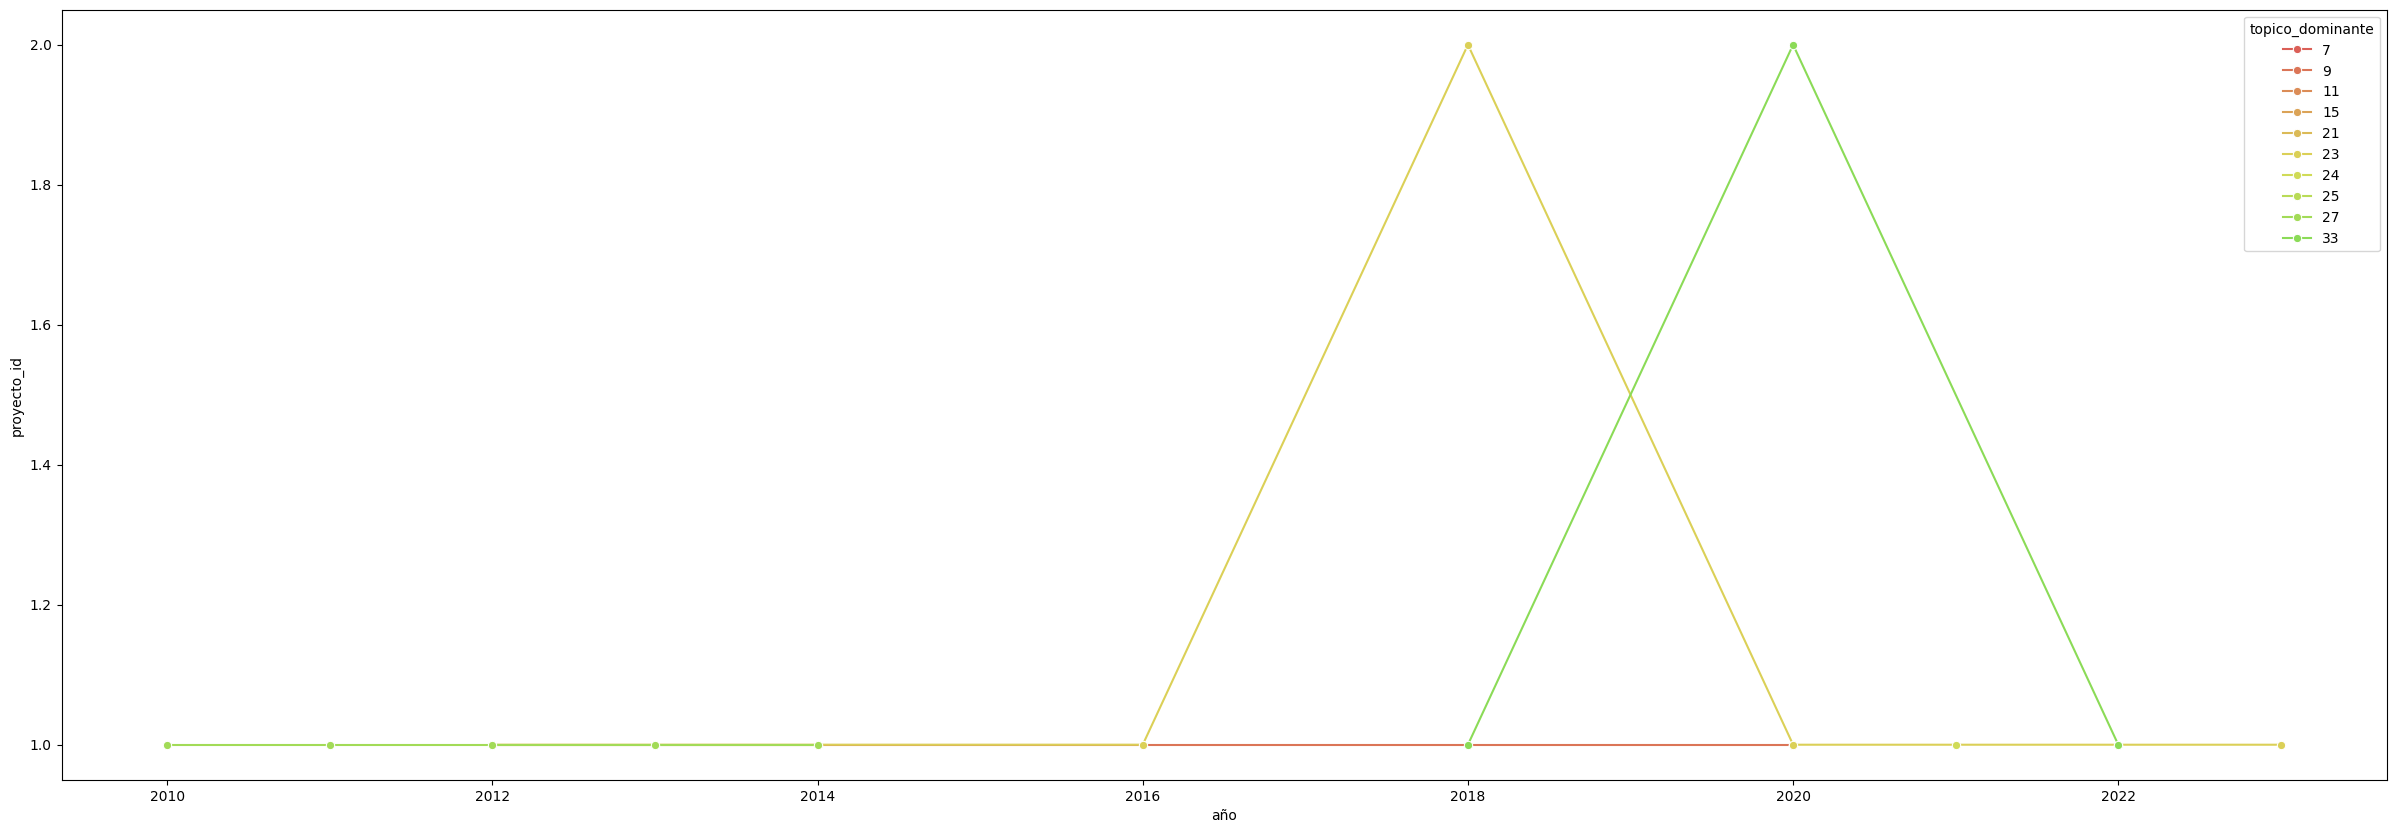

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

palette = sns.color_palette("hls", 35)
f, ax = plt.subplots( figsize=(30, 10))
sns.lineplot(x=ano_tipo_df['año'], y=ano_tipo_df['proyecto_id'], estimator='sum',  hue = 'topico_dominante', marker="o" ,palette = palette, data =ano_tipo_df,  errorbar= None , linestyle='-',ax = ax)


In [17]:
### LDA model####
lda_model = pickle.load(open("./lda_model_SALUD_LEY_1023.pkl", "rb"))

In [19]:
dictionary_SALUD = pickle.load(open("./dictionary_SALUD_LEY_1023.pkl", "rb"))


In [21]:
# Topico
lista_topico = [7,9,11,15,21,23,24,25,27,33]

In [24]:
for i  in lista_topico:
    print(i)
    print([dictionary_SALUD.id2token[term[0]] for term in lda_model.get_topic_terms(i)[0:7]])

7
['leyenda', 'elaborado', 'producto', 'alimenticio', 'obligatoriedad', 'tabaco', 'publicidad']
9
['publico', 'establecimiento', 'servicio', 'privado', 'agua', 'salud', 'acceso']
11
['regimen', 'ejercicio', 'profesional', 'medicinal', 'asistido', 'regulacion', 'actividad']
15
['sexual', 'salud', 'trabajo', 'civil', 'quistico', 'modificación', 'identidad']
21
['medico', 'cobertura', 'obligatorio', 'epidermolisis', 'programa', 'bullós', 'enfermedad']
23
['nino', 'medicamento', 'adolescente', 'edad', 'mujer', 'integral', 'embarazado']
24
['alto', 'cardiopulmonar', 'complejidad', 'rcp', 'analisis', 'academia', 'rojo']
25
['persona', 'integral', 'sistema', 'salud', 'modificación', 'social', 'discapacidad']
27
['materno', 'desfibrilador', 'espacio', 'red', 'externo', 'publico', 'leche']
33
['deportivo', 'personal', 'salud', 'paciente', 'actividad', 'derecho', 'historia']
